In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        all_lines = training_file.readlines()[1:] #remove header
        length = len(all_lines)
        labels = np.zeros(length)
        images = np.zeros((length, 28, 28))
        for idx, line in enumerate(all_lines):
            line = line.strip().split(',')
            if not line:
                continue
            #add the label
            labels[idx] = int(line[0])
            #add the image
            image = np.asarray(line[1:], dtype=np.float32)
            image = np.array_split(image, 28)
            images[idx, :, :] = image
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
                    # Your Code Here
                    rescale = 1./255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                    )

validation_datagen = ImageDataGenerator(
                    # Your Code Here
                    rescale = 1./255.
                    )
'''
train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                     #class_mode='categorical',
                                     batch_size = 32)
validation_generator = validation_datagen.flow(testing_images,
                                               testing_labels,
                                               #class_mode='categorical',
                                               batch_size = 32)
'''
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
#from tensorflow.keras.optimizers import RMSprop
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
                                    # Your Code Here
                                    # first convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # second convolution
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(26, activation='softmax')
                                    ])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='rmsprop',#'adam',
              metrics=['accuracy'])# Your Code Here)


# Train the Model
'''
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              epochs=2,
                              steps_per_epoch=20,
                              validation_steps=3)# Your Code Here (set 'epochs' = 2))
'''
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 81s 94ms/step - loss: 2.6505 - accuracy: 0.1929 - val_loss: 1.9054 - val_accuracy: 0.3363
Epoch 2/15
858/857 [==============================] - 78s 91ms/step - loss: 1.8675 - accuracy: 0.4063 - val_loss: 0.9030 - val_accuracy: 0.6966
Epoch 3/15
858/857 [==============================] - 80s 93ms/step - loss: 1.4710 - accuracy: 0.5226 - val_loss: 0.6899 - val_accuracy: 0.7635
Epoch 4/15
858/857 [==============================] - 83s 97ms/step - loss: 1.2442 - accuracy: 0.5939 - val_loss: 0.5565 - val_accuracy: 0.8005
Epoch 5/15
858/857 [==============================] - 83s 97ms/step - loss: 1.0807 - accuracy: 0.6461 - val_loss: 0.4853 - val_accuracy: 0.8437
Epoch 6/15
858/857 [==============================] - 82s 96ms/step - loss: 0.9779 - accuracy: 0.6806 - val_loss: 0.4204 - val_accuracy: 0.8603
Epoch 7/15
858/857 [==============================] - 82s 96ms/step - loss: 0.8935 - accuracy: 0.7073 - val_loss: 0.3648 - val_accuracy:

[81.8743927887014, 0.7997769]

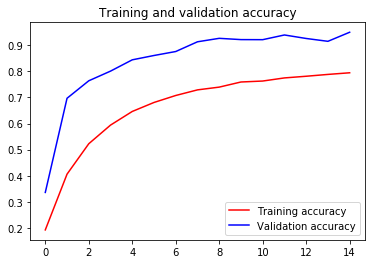

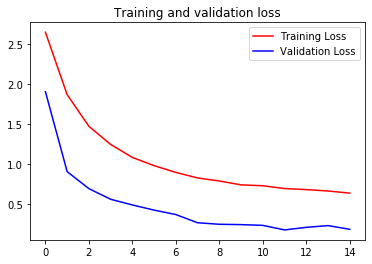

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy'] # Your Code Here
val_acc = history.history['val_accuracy'] # Your Code Here
loss = history.history['loss'] # Your Code Here
val_loss = history.history['val_loss'] # Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);